In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset into a pandas DataFrame
data = pd.read_excel("./ENB2012_data.xlsx")


In [4]:
# Save the DataFrame as a CSV file
data.to_csv("./ENB2012_data.csv", index=False)

In [5]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv("./ENB2012_data.csv")

In [6]:
# Separate features (X) and responses (Y)
X = data.iloc[:, 0:8]
Y = data.iloc[:, 8:]


In [7]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [8]:
# Normalize the features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
Y_pred_lin = linear_reg.predict(X_test)


In [10]:
# Ridge regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, Y_train)
Y_pred_ridge = ridge_reg.predict(X_test)

In [11]:
# Lasso regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, Y_train)
Y_pred_lasso = lasso_reg.predict(X_test)

In [12]:
# Random forest regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, Y_train)
Y_pred_rf = rf_reg.predict(X_test)

In [14]:
# Evaluate mean squared error (MSE) and R2 score for each regression technique
mse_lin = mean_squared_error(Y_test, Y_pred_lin)
r2_lin = r2_score(Y_test, Y_pred_lin)

mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)

mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)

mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print("Linear Regression: MSE =", mse_lin, "R2 =", r2_lin)
print("Ridge Regression: MSE =", mse_ridge, "R2 =", r2_ridge)
print("Lasso Regression: MSE =", mse_lasso, "R2 =", r2_lasso)
print("Random Forest Regression: MSE =", mse_rf, "R2 =", r2_rf)


Linear Regression: MSE = 9.810163166426527 R2 = 0.8997338948958488
Ridge Regression: MSE = 9.575509360820009 R2 = 0.9021781373823696
Lasso Regression: MSE = 13.08833060036498 R2 = 0.8661900163839664
Random Forest Regression: MSE = 1.9757976528896062 R2 = 0.9788225922996614


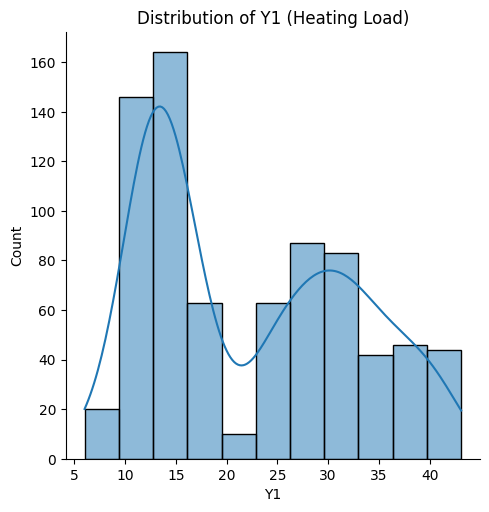

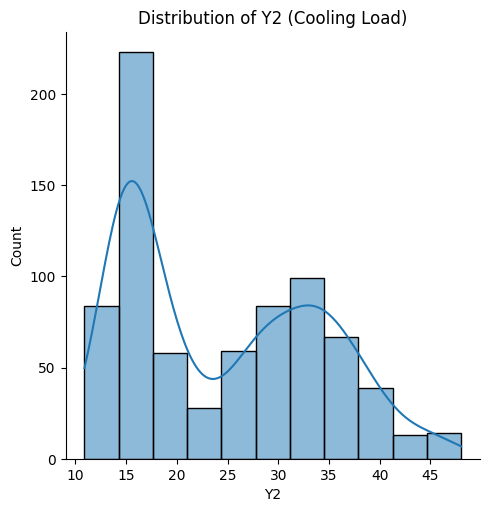

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for Y1
sns.displot(data, x="Y1", kde=True)
plt.title("Distribution of Y1 (Heating Load)")
plt.show()

# Distribution plot for Y2
sns.displot(data, x="Y2", kde=True)
plt.title("Distribution of Y2 (Cooling Load)")
plt.show()


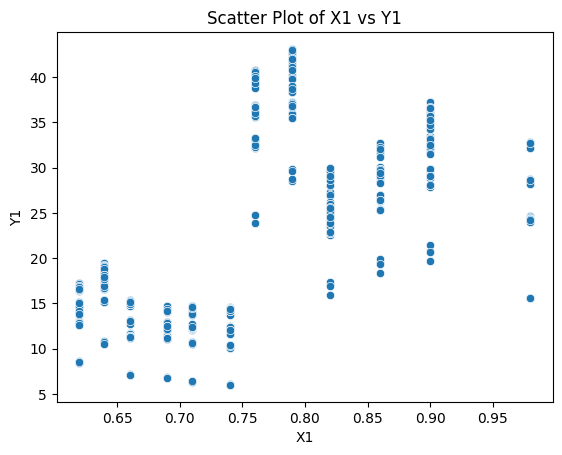

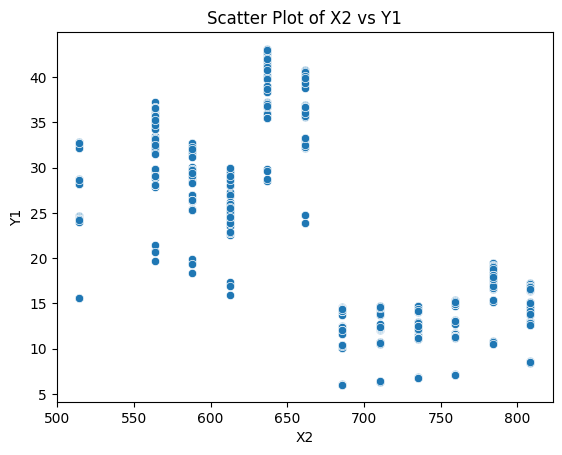

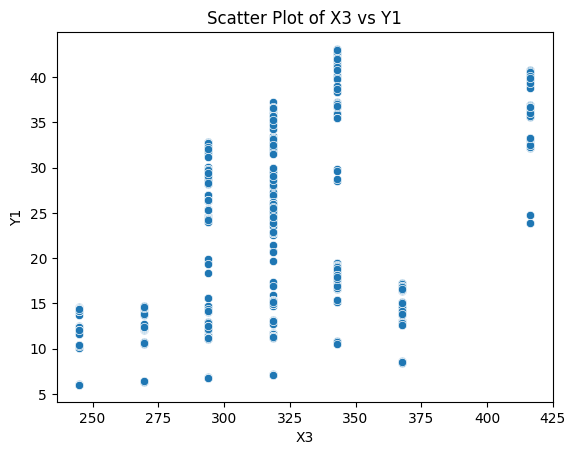

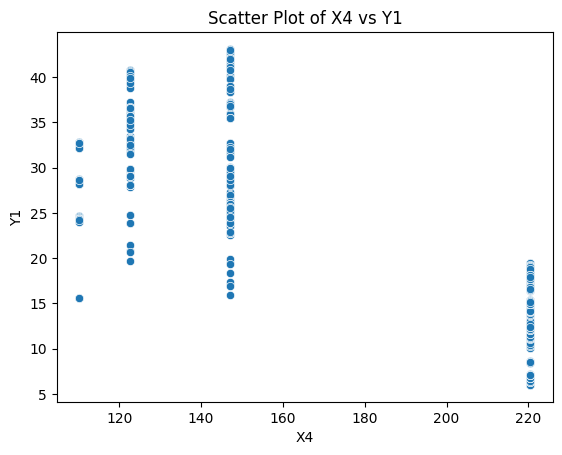

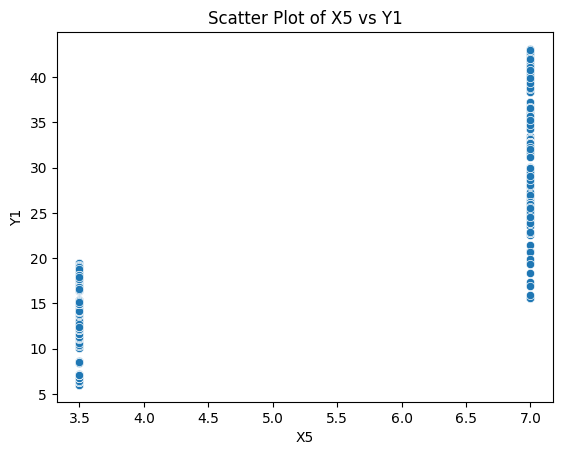

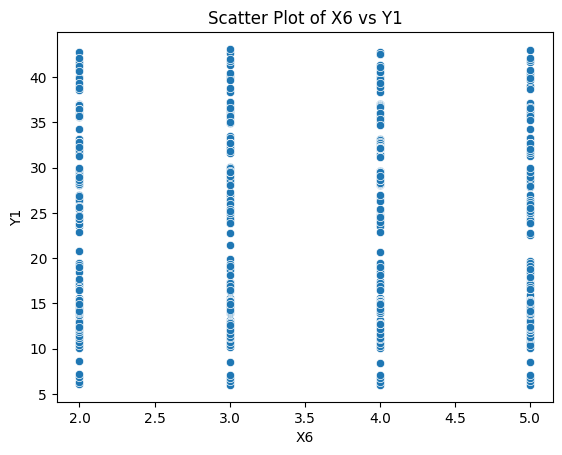

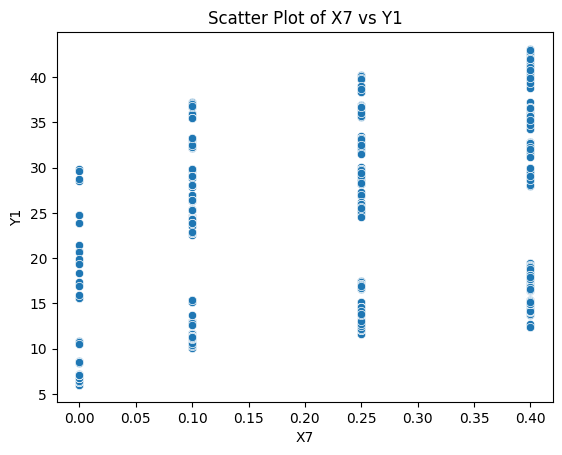

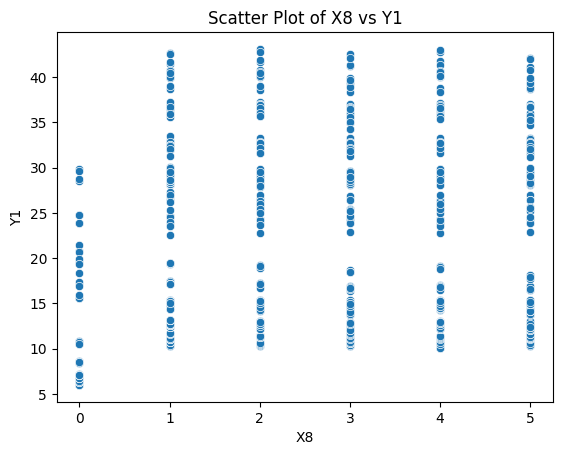

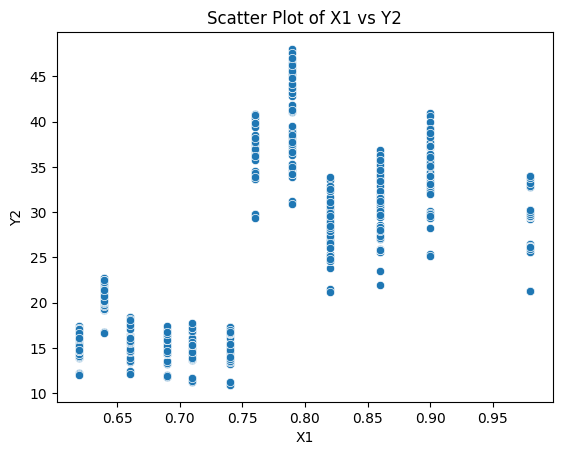

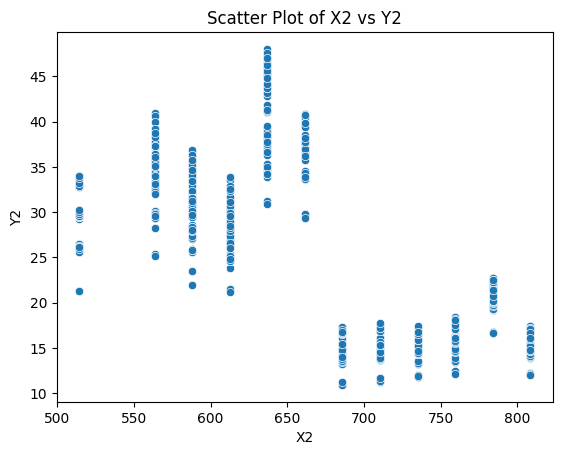

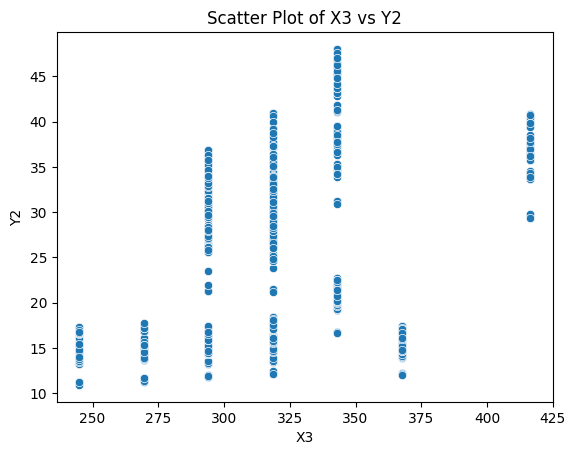

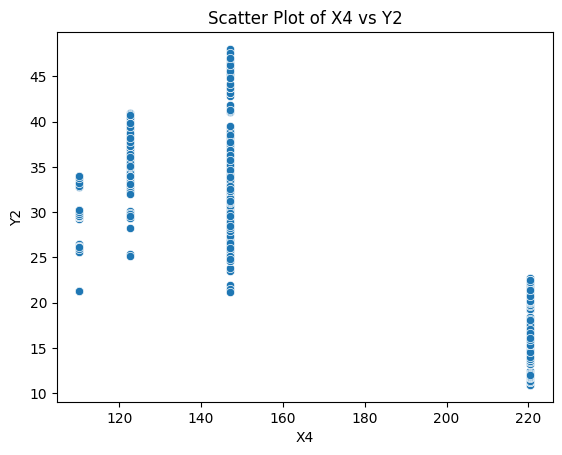

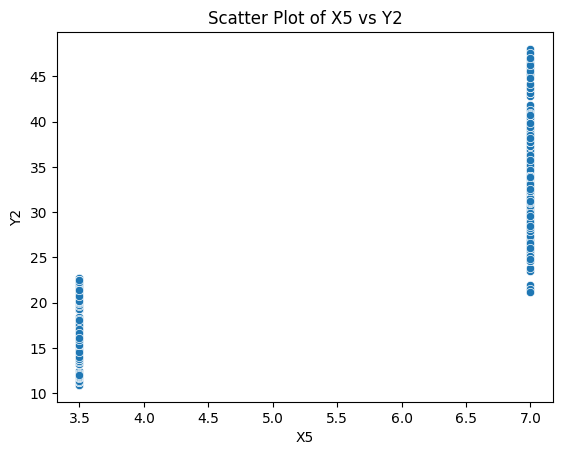

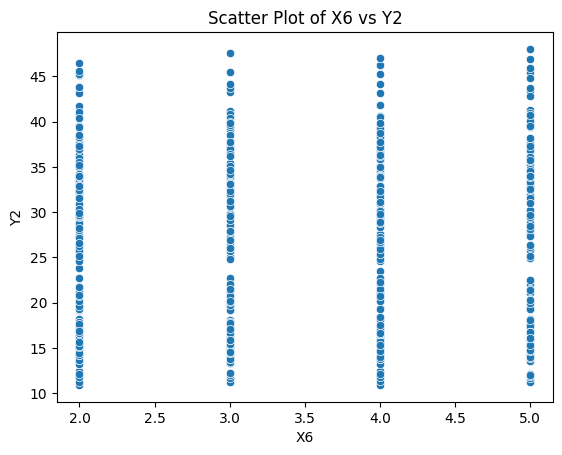

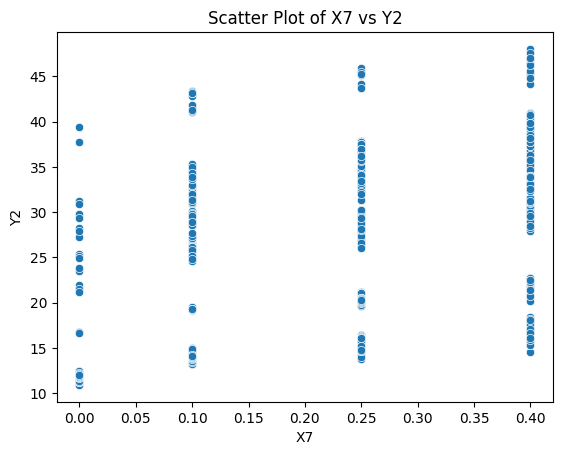

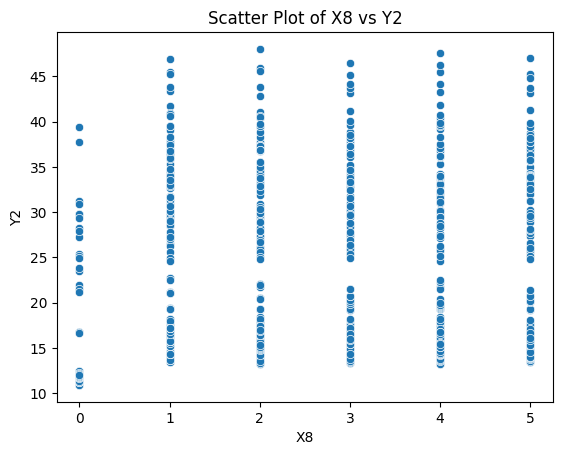

In [16]:
# Scatter plot for each feature against Y1
for i in range(1, 9):
    sns.scatterplot(data=data, x=f"X{i}", y="Y1")
    plt.title(f"Scatter Plot of X{i} vs Y1")
    plt.show()

# Scatter plot for each feature against Y2
for i in range(1, 9):
    sns.scatterplot(data=data, x=f"X{i}", y="Y2")
    plt.title(f"Scatter Plot of X{i} vs Y2")
    plt.show()


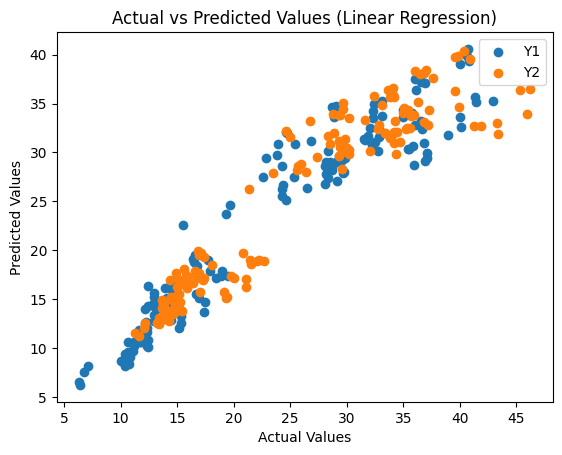

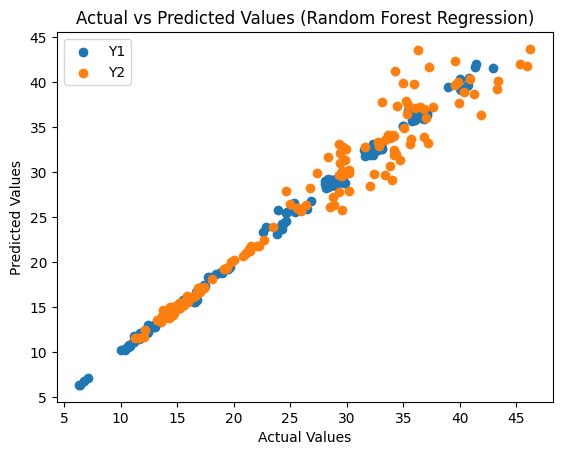

In [17]:
# Scatter plot of actual vs predicted values for Y1 and Y2 (Linear Regression)
plt.scatter(Y_test["Y1"], Y_pred_lin[:, 0], label="Y1")
plt.scatter(Y_test["Y2"], Y_pred_lin[:, 1], label="Y2")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.legend()
plt.show()

# Scatter plot of actual vs predicted values for Y1 and Y2 (Random Forest Regression)
plt.scatter(Y_test["Y1"], Y_pred_rf[:, 0], label="Y1")
plt.scatter(Y_test["Y2"], Y_pred_rf[:, 1], label="Y2")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest Regression)")
plt.legend()
plt.show()



In [18]:
# Calculate correlation coefficients between features and response variables
correlations = data.corr()

# Display correlation coefficients between X1 to X8 and Y1
print("Correlations between X1 to X8 and Y1:")
print(correlations.loc["X1":"X8", "Y1"])

# Display correlation coefficients between X1 to X8 and Y2
print("\nCorrelations between X1 to X8 and Y2:")
print(correlations.loc["X1":"X8", "Y2"])


Correlations between X1 to X8 and Y1:
X1    0.622272
X2   -0.658120
X3    0.455671
X4   -0.861828
X5    0.889430
X6   -0.002587
X7    0.269842
X8    0.087368
Name: Y1, dtype: float64

Correlations between X1 to X8 and Y2:
X1    0.634339
X2   -0.672999
X3    0.427117
X4   -0.862547
X5    0.895785
X6    0.014290
X7    0.207505
X8    0.050525
Name: Y2, dtype: float64


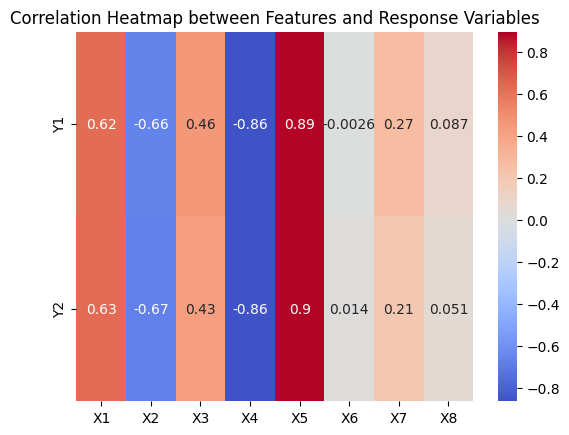

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate heatmap of correlation coefficients between X1 to X8 and Y1, Y2
heatmap_data = correlations.loc[["Y1", "Y2"], "X1":"X8"]
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap between Features and Response Variables")
plt.show()


In [ ]:
# Based on the correlation coefficients 
#  we can select features that have a strong correlation 
# (either positive or negative) with the response variables (Y1 and Y2).
#  Let's consider features with correlation coefficients greater than
#  0.5 or less than -0.5 as having a strong correlation.

# For Y1:

# X1: 0.622272 (positive correlation)
# X2: -0.658120 (negative correlation)
# X4: -0.861828 (negative correlation)
# X5: 0.889430 (positive correlation)
# For Y2:

# X1: 0.634339 (positive correlation)
# X2: -0.672999 (negative correlation)
# X4: -0.862547 (negative correlation)
# X5: 0.895785 (positive correlation)
# Based on these results, we should consider using features X1, X2, X4, and X5 for our regression models, 
# as they show strong correlations with both Y1 and Y2. 
#By focusing on these features, our models may have better predictive performance than if we used all of the features. 




In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the relevant features and response variables
X = data[['X1', 'X2', 'X4', 'X5']]
Y = data[['Y1', 'Y2']]

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a Linear Regression model for Y1
model_Y1 = LinearRegression()
model_Y1.fit(X_train, Y_train['Y1'])

# Make predictions for Y1 on the testing set
Y1_pred = model_Y1.predict(X_test)

# Calculate performance metrics for Y1
mse_Y1 = mean_squared_error(Y_test['Y1'], Y1_pred)
r2_Y1 = r2_score(Y_test['Y1'], Y1_pred)

print("Mean Squared Error for Y1:", mse_Y1)
print("R-squared for Y1:", r2_Y1)

# Train a Linear Regression model for Y2
model_Y2 = LinearRegression()
model_Y2.fit(X_train, Y_train['Y2'])

# Make predictions for Y2 on the testing set
Y2_pred = model_Y2.predict(X_test)

# Calculate performance metrics for Y2
mse_Y2 = mean_squared_error(Y_test['Y2'], Y2_pred)
r2_Y2 = r2_score(Y_test['Y2'], Y2_pred)

print("\nMean Squared Error for Y2:", mse_Y2)
print("R-squared for Y2:", r2_Y2)


Mean Squared Error for Y1: 15.68625772437703
R-squared for Y1: 0.8495069064175347

Mean Squared Error for Y2: 13.53940563188366
R-squared for Y2: 0.8538764365185733


In [21]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

def train_and_evaluate_model(model, X_train, X_test, Y_train, Y_test):
    # Train the model for Y1
    model_Y1 = model()
    model_Y1.fit(X_train, Y_train['Y1'])

    # Make predictions for Y1 on the testing set
    Y1_pred = model_Y1.predict(X_test)

    # Calculate performance metrics for Y1
    mse_Y1 = mean_squared_error(Y_test['Y1'], Y1_pred)
    r2_Y1 = r2_score(Y_test['Y1'], Y1_pred)

    # Train the model for Y2
    model_Y2 = model()
    model_Y2.fit(X_train, Y_train['Y2'])

    # Make predictions for Y2 on the testing set
    Y2_pred = model_Y2.predict(X_test)

    # Calculate performance metrics for Y2
    mse_Y2 = mean_squared_error(Y_test['Y2'], Y2_pred)
    r2_Y2 = r2_score(Y_test['Y2'], Y2_pred)

    return mse_Y1, r2_Y1, mse_Y2, r2_Y2

# Ridge Regression
mse_Y1, r2_Y1, mse_Y2, r2_Y2 = train_and_evaluate_model(Ridge, X_train, X_test, Y_train, Y_test)
print("Ridge Regression")
print("Mean Squared Error for Y1:", mse_Y1)
print("R-squared for Y1:", r2_Y1)
print("Mean Squared Error for Y2:", mse_Y2)
print("R-squared for Y2:", r2_Y2)
print()

# Lasso Regression
mse_Y1, r2_Y1, mse_Y2, r2_Y2 = train_and_evaluate_model(Lasso, X_train, X_test, Y_train, Y_test)
print("Lasso Regression")
print("Mean Squared Error for Y1:", mse_Y1)
print("R-squared for Y1:", r2_Y1)
print("Mean Squared Error for Y2:", mse_Y2)
print("R-squared for Y2:", r2_Y2)
print()

# Random Forest Regression
mse_Y1, r2_Y1, mse_Y2, r2_Y2 = train_and_evaluate_model(RandomForestRegressor, X_train, X_test, Y_train, Y_test)
print("Random Forest Regression")
print("Mean Squared Error for Y1:", mse_Y1)
print("R-squared for Y1:", r2_Y1)
print("Mean Squared Error for Y2:", mse_Y2)
print("R-squared for Y2:", r2_Y2)
print()

# Gradient Boosting Regression
mse_Y1, r2_Y1, mse_Y2, r2_Y2 = train_and_evaluate_model(GradientBoostingRegressor, X_train, X_test, Y_train, Y_test)
print("Gradient Boosting Regression")
print("Mean Squared Error for Y1:", mse_Y1)
print("R-squared for Y1:", r2_Y1)
print("Mean Squared Error for Y2:", mse_Y2)
print("R-squared for Y2:", r2_Y2)


Ridge Regression
Mean Squared Error for Y1: 15.715603256869995
R-squared for Y1: 0.8492253669933272
Mean Squared Error for Y2: 13.599250930935314
R-squared for Y2: 0.8532305582139565

Lasso Regression
Mean Squared Error for Y1: 21.879811477337757
R-squared for Y1: 0.7900862924680488
Mean Squared Error for Y2: 21.148599275988882
R-squared for Y2: 0.77175447926821

Random Forest Regression
Mean Squared Error for Y1: 9.325902550001901
R-squared for Y1: 0.9105278040270037
Mean Squared Error for Y2: 7.588948470862426
R-squared for Y2: 0.9180965380763865

Gradient Boosting Regression
Mean Squared Error for Y1: 9.316927748938461
R-squared for Y1: 0.9106139077746315
Mean Squared Error for Y2: 7.593253994194245
R-squared for Y2: 0.9180500708658601
